In [1]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from jupyterthemes import jtplot
jtplot.style()



# Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

# 1. Load the tips dataset from either pydataset or seaborn.


In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2.  Fit a linear regression model (ordinary least squares) and compute yhat, predictions of
tip using total_bill.

Here is some sample code to get you started:

from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)

The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [4]:
from statsmodels.formula.api import ols
tips['baseline'] = tips.tip.mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


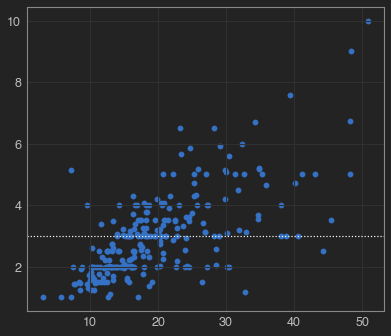

In [8]:
plt.scatter(tips.total_bill,tips.tip)
plt.axhline(tips.tip.mean(), ls = ':')

In [5]:

model = ols('tip ~ total_bill', data=tips).fit()
tips['yhat'] = model.predict(tips.total_bill)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


# 3. Plot the residuals for the linear regression model that you made.

In [10]:
tips['residuals'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


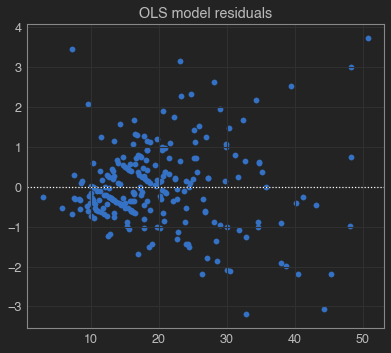

In [11]:
plt.scatter(tips.total_bill, tips.residuals)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

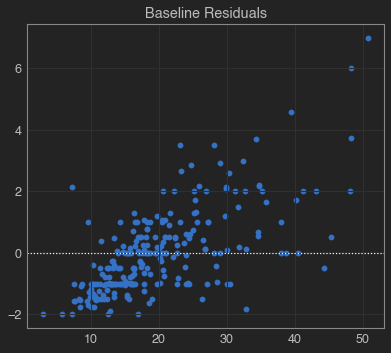

In [12]:
plt.scatter(tips.total_bill, tips.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [15]:
tips['residual^2'] = tips.residuals**2
tips['baseline_residual^2'] = tips.baseline_residual**2
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [18]:
from sklearn.metrics import mean_squared_error
SSE = (mean_squared_error(tips.tip, tips.yhat))*len(tips)
SSE, tips['residual^2'].sum()

(252.788743850776, 252.788743850776)

In [19]:
TSS = SSE_baseline = tips['baseline_residual^2'].sum()
TSS

465.2124770491804

In [20]:
ESS = TSS - SSE
ESS

212.4237331984044

In [21]:
MSE = mean_squared_error(tips.tip,tips.yhat)
MSE

1.036019442011377

In [22]:
RMSE = mean_squared_error(tips.tip,tips.yhat, squared=False)
RMSE

1.0178504025697377

# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).


In [23]:
SSE_baseline

465.2124770491804

In [24]:
MSE_baseline = mean_squared_error(tips.tip, tips.baseline)
MSE_baseline

1.906608512496641

In [25]:
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared=False)
RMSE_baseline

1.3807999538298954

# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [27]:
def compare_SSE(sse, sse_baseline):
    if sse < sse_baseline:
        print (f'Model SSE {sse} is < Baseline SSE {sse_baseline} so the model is better than baseline')
    else:
        print ('Model SSE is worse than baseline')

In [28]:
compare_SSE(SSE, SSE_baseline)

Model SSE 252.788743850776 is < Baseline SSE 465.2124770491804 so the model is better than baseline


# 7. What is the amount of variance explained in your model?

In [36]:
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [33]:
evs = explained_variance_score(tips.tip, tips.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


# 8. Is your model significantly better than the baseline model?

In [35]:
model.summary()
#p is < than a but R^2 isn't that great

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        14:39:42   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9. Create a file named evaluate.py that contains the following functions.

 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
     - sum of squared errors (SSE)
     - explained sum of squares (ESS)
     - total sum of squares (TSS)
     - mean squared error (MSE)
     - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
 - model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)
 

In [41]:
from sklearn.metrics import mean_squared_error

def plot_residuals(y, yhat, baseline_residuals):
    plt.scatter(y, yhat)
    plt.axhline(y = 0, ls = ':')
    plt.title('OLS model residuals')
    plt.show()
    
    plt.scatter(y, baseline_residuals)
    plt.axhline(y = 0, ls = ':')
    plt.title('Baseline Residuals')
    plt.show()

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


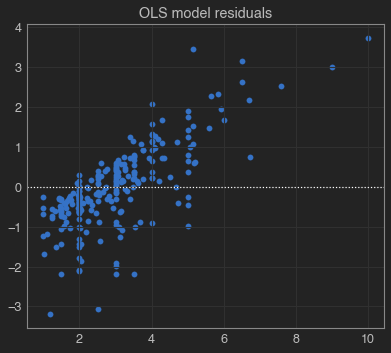

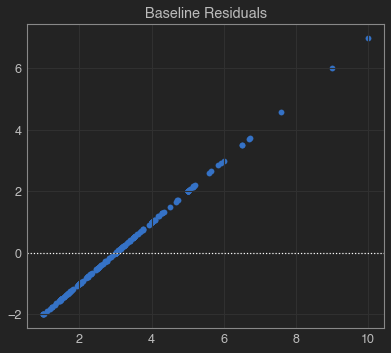

In [42]:
plot_residuals(tips.tip, tips.residuals, tips.baseline_residual)

In [53]:
'''sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS) 
    df['baseline'] = df.y.mean()
    df['baseline_residual'] = df.y - df.baseline
    TSS = SSE_baseline =  df['baseline_residual^2'].sum()
mean squared error (MSE)
root mean squared error (RMSE)'''

def regression_errors(y, yhat, df):
    MSE = mean_squared_error(y,yhat)
    SSE = (mean_squared_error(y, yhat))*len(y)
    
    df['baseline'] = y.mean()
    df['baseline_residual'] = y - df.baseline
    df['baseline_residual^2'] = df.baseline_residual**2
    
    TSS = df['baseline_residual^2'].sum()
    
    ESS = TSS - SSE
    RMSE = mean_squared_error(y,yhat, squared=False)
    print (f'sum of squared errors (SSE): {SSE}')
    print (f'explained sum of squares (ESS): {ESS}')
    print (f'total sum of squares (TSS): {TSS}')
    print (f'mean squared error (MSE): {MSE}')
    print (f'root mean squared error (RMSE): {RMSE}')

In [54]:
regression_errors(tips.tip, tips.yhat, tips)

sum of squared errors (SSE): 252.788743850776
explained sum of squares (ESS): 212.4237331984044
total sum of squares (TSS): 465.2124770491804
mean squared error (MSE): 1.036019442011377
root mean squared error (RMSE): 1.0178504025697377


In [55]:
# baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(y,df):
    df['baseline'] = y.mean()
    df['baseline_residual'] = y - df.baseline
    df['baseline_residual^2'] = df.baseline_residual**2
    
    SSE = df['baseline_residual^2'].sum()
    MSE = mean_squared_error(y, df.baseline)
    RMSE = mean_squared_error(y, df.baseline, squared=False)
    
    print (f'sum of squared errors (SSE): {SSE}')
    print (f'mean squared error (MSE): {MSE}')
    print (f'root mean squared error (RMSE): {RMSE}')

In [56]:
baseline_mean_errors(tips.tip, tips)

sum of squared errors (SSE): 465.2124770491804
mean squared error (MSE): 1.906608512496641
root mean squared error (RMSE): 1.3807999538298954


In [57]:
def better_than_baseline(y, yhat, df): 
    SSE = (mean_squared_error(y, yhat))*len(y)
    
    df['baseline'] = y.mean()
    df['baseline_residual'] = y - df.baseline
    df['baseline_residual^2'] = df.baseline_residual**2
    
    SSE_baseline = df['baseline_residual^2'].sum()
    
    if SSE < SSE_baseline:
        print (f'Model SSE {SSE} is < Baseline SSE {SSE_baseline} so the model is better than baseline')
    else:
        print ('Model SSE is worse than baseline')

In [59]:
better_than_baseline(tips.tip, tips.yhat, tips)

Model SSE 252.788743850776 is < Baseline SSE 465.2124770491804 so the model is better than baseline


# 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

